#**Support Vector Regression**

####Oridinary least Square Method used in simple Regression

####**RBF kernal** 

we need more data to fit into our model so that we are not spliting our data into training and testing set 

###**Soft-Margin** 
###**What does epsilon do in SVR?**

SVR has an additional tunable parameter ε (epsilon). The value of epsilon determines the width of the tube around the estimated function (hyperplane). Points that fall inside this tube are considered as correct predictions and are not penalized by the algorithm.

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt  

In [2]:
data = pd.read_csv('/content/Position_Salaries.csv')
data.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [3]:
x = data.iloc[:,1:-1].values
y = data.iloc[:,-1].values

In [4]:
x

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]])

In [5]:
y

array([  45000,   50000,   60000,   80000,  110000,  150000,  200000,
        300000,  500000, 1000000])

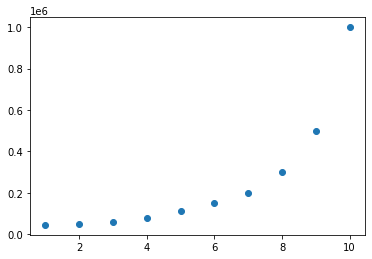

In [6]:
plt.scatter(x,y)

##**Feature scaling** 

In [7]:
#Feature scaling is required in SVM, if not in same range then apply feature scaling 
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_Y = StandardScaler()
x = sc_X.fit_transform(x)
y = sc_Y.fit_transform(y.reshape(len(y),1)) 

In [8]:
x

array([[-1.5666989 ],
       [-1.21854359],
       [-0.87038828],
       [-0.52223297],
       [-0.17407766],
       [ 0.17407766],
       [ 0.52223297],
       [ 0.87038828],
       [ 1.21854359],
       [ 1.5666989 ]])

In [9]:
y

array([[-0.72004253],
       [-0.70243757],
       [-0.66722767],
       [-0.59680786],
       [-0.49117815],
       [-0.35033854],
       [-0.17428902],
       [ 0.17781001],
       [ 0.88200808],
       [ 2.64250325]])

##**Training SVR Model on the Whole dataset**

In [10]:
#support vectors are the closest vector to the Regression Line 
#C is the allowence of the marjin that is the soft margin 
from sklearn.svm import SVR
#radialbasiskernal
# regressor = SVR(kernel = "rbf")
regressor = SVR()
#reshape into 1D array using ravel
regressor.fit(x,np.ravel(y)) 

SVR()

In [11]:
regressor.predict(x)

array([-0.6197853 , -0.62924694, -0.56788994, -0.49732233, -0.44690338,
       -0.36617206, -0.14115569,  0.28557658,  0.78226531,  1.08559794])

##**Predicting New result** 

In [12]:
#using the dataset scaler to transform
result = regressor.predict(sc_X.transform([[6.5]])).reshape(-1,1)
result

array([[-0.27861589]])

In [13]:
print(sc_Y.inverse_transform(result))

[[170370.0204065]]


#**Visualizing the result**  

In [14]:
sc_Y.inverse_transform(regressor.predict(x).reshape(-1,1))

array([[ 73474.15615697],
       [ 70786.94584626],
       [ 88213.00902103],
       [108254.98574956],
       [122574.52250599],
       [145503.10688572],
       [209410.23132923],
       [330606.89204569],
       [471671.95587315],
       [557821.75899897]])

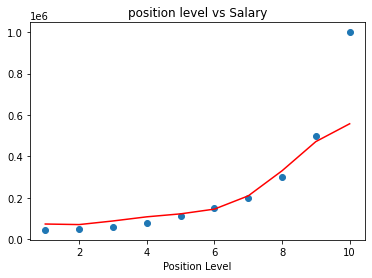

In [15]:
# sc_Y.inverse_transform(regressor.predict(x)).reshape(-1,1)
plt.scatter(sc_X.inverse_transform(x),sc_Y.inverse_transform(y))
plt.plot(sc_X.inverse_transform(x),sc_Y.inverse_transform(regressor.predict(x).reshape(-1,1)),color='red')
plt.title("position level vs Salary")
plt.xlabel('Position Level')
plt.show()

##**Visualizing the SVR results(for higher resolution and smoother curve)**

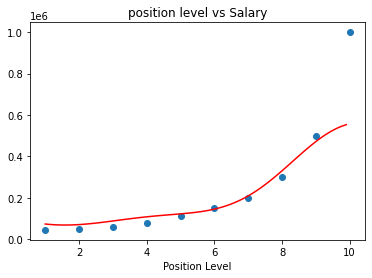

In [21]:
X_grid = np.arange(min(sc_X.inverse_transform(x)), max(sc_X.inverse_transform(x)), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
# sc_Y.inverse_transform(regressor.predict(x)).reshape(-1,1)
plt.scatter(sc_X.inverse_transform(x),sc_Y.inverse_transform(y))
plt.plot(X_grid,sc_Y.inverse_transform(regressor.predict(sc_X.transform(X_grid)).reshape(-1,1)),color='red')
plt.title("position level vs Salary")
plt.xlabel('Position Level')
plt.show()